# Análisis del bienestar de las entidades de México

En esta libreta utilizaremos algunas herramientas para descubrir si hay relaciones entre ciertos indicadores de bienestar y las entidades de México.

Primeramente, cargaremos la información y las librerías que necesitamos.

In [1]:
import numpy as np
import pandas as pd

df_bienestar = pd.read_csv("indicadores_bienestar_2014.csv", index_col = 0)
df_bienestar.index.names = ['Entidad']
df_bienestar.columns.names = ['Indicadores']

df_bienestar = df_bienestar[1:] # Ignoramos los indicadores globales.

Ahora nos quedaremos con los indicadores que nos interesan para este análisis. Exploraremos si existe alguna relación entre el acceso a banda ancha y otros indicadores de la vida de los mexicanos.

In [2]:
columnas = ['Hogares con acceso a banda ancha',
           'Participación cívica y política',
           'Participación electoral',
           'Niveles de educación',
           'Deserción escolar',
           'Años promedio de escolaridad',
           'Satisfacción con la vida',
           'Satisfacción con tiempo para ocio']
df_bienestar = df_bienestar[columnas]

In [3]:
df_bienestar.head()

Indicadores,Hogares con acceso a banda ancha,Participación cívica y política,Participación electoral,Niveles de educación,Deserción escolar,Años promedio de escolaridad,Satisfacción con la vida,Satisfacción con tiempo para ocio
Entidad,,,,,,,,
Aguascalientes,37.92,8.4,37.2,42.5,12.1,9.7,7.7,7.3
Baja California,51.46,4.1,30.9,44.8,19.3,9.7,8.3,8.0
Baja California Sur,43.85,3.0,52.6,48.4,11.7,9.8,8.3,8.0
Campeche,27.10,11.2,61.2,40.6,15.0,9.1,7.8,7.6
Coahuila de Zaragoza,34.56,6.5,45.0,42.9,19.1,9.8,8.0,7.8


Como es costumbre, veremos el resumen estadístico de los datos.

In [4]:
df_bienestar.describe()

Indicadores,Hogares con acceso a banda ancha,Participación cívica y política,Participación electoral,Niveles de educación,Deserción escolar,Años promedio de escolaridad,Satisfacción con la vida,Satisfacción con tiempo para ocio
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,33.519375,7.096875,48.153125,39.875000,13.100000,9.096875,7.953125,7.746875
std,11.083372,3.002524,9.238000,6.587917,4.188001,0.819711,0.239602,0.247548
min,9.470000,1.700000,30.900000,27.700000,2.800000,7.200000,7.500000,7.300000
25%,25.762500,4.100000,41.675000,35.425000,11.100000,8.675000,7.800000,7.600000
50%,32.825000,7.450000,45.950000,40.700000,13.000000,9.200000,7.900000,7.750000
75%,41.765000,9.325000,55.575000,43.100000,15.975000,9.525000,8.125000,7.925000
max,55.100000,13.000000,70.900000,58.800000,19.300000,11.100000,8.400000,8.300000


## Análisis en Componentes Principales

La primera herramienta que usaremos es el PCA para reducir todos los indicadores a dos atributos que podamos visualizar en una gráfica en dos dimensiones.

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)
pca.fit(df_bienestar)
bienestar_pca = pca.transform(df_bienestar)

bienestar_pca_df = pd.DataFrame(bienestar_pca)
bienestar_pca_df.index = df_bienestar.index
bienestar_pca_df.columns = ['CP_1', 'CP_2', 'CP_3']

bienestar_pca_df.head() 

,CP_1,CP_2,CP_3
Entidad,,,
Aguascalientes,-5.809354,-10.286974,1.276862
Baja California,-19.434325,-16.220078,-6.491449
Baja California Sur,-13.134769,5.208298,1.317476
Campeche,6.561284,13.012678,-1.624862
Coahuila de Zaragoza,-2.602589,-3.016457,-5.664681


Ahora podemos ver que tanta varianza es explicada por nuestras 3 componentes principales.

In [7]:
print("Varianza explicada por cada componente principal: {}".format(pca.explained_variance_ratio_))
print("Varianza total explicada: {}".format(sum(pca.explained_variance_ratio_)))

Varianza explicada por cada componente principal: [0.57146947 0.30800469 0.06320868]
Varianza total explicada: 0.9426828433270366


Así, con tres componentes principales podemos explicar buena parte de la varianza, aunque no llegemos al 98%.

Ahora visualizaremos en 3 dimensiones los resultados del análisis en componentes principales.

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

<IPython.core.display.Javascript object>


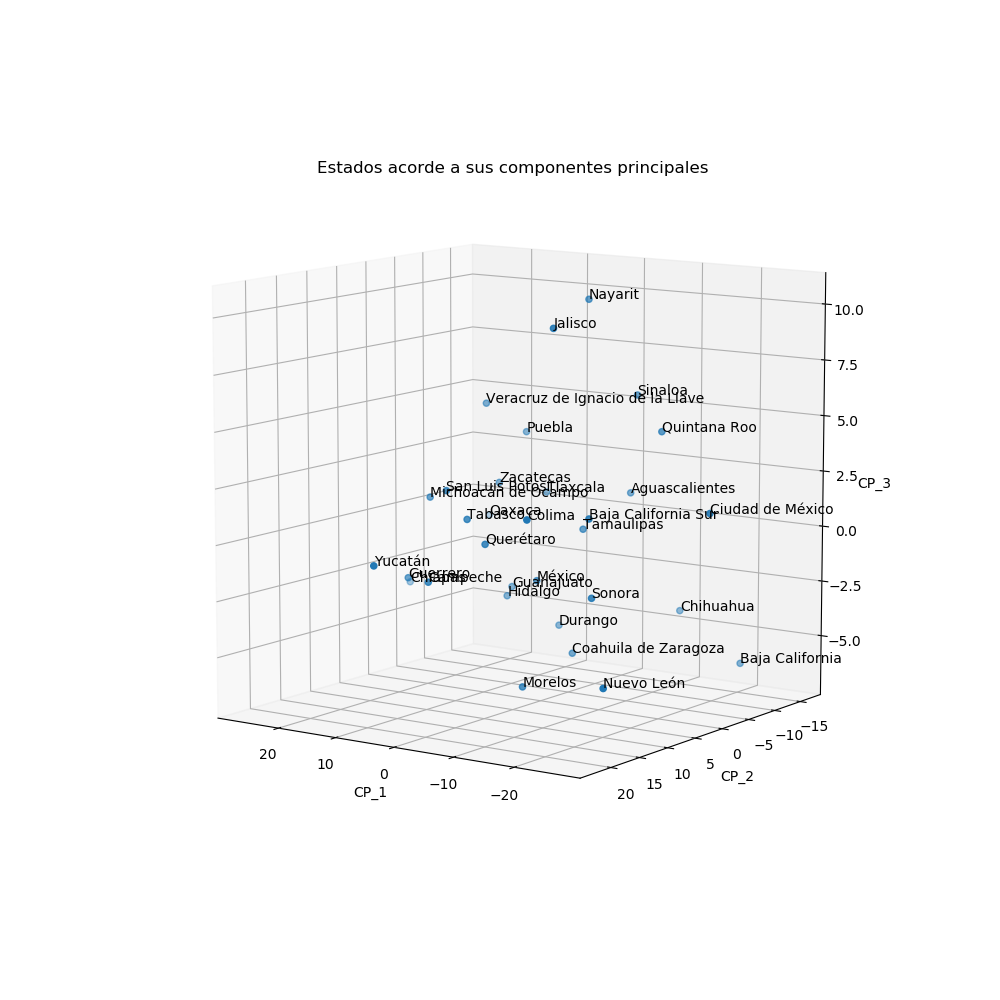

In [15]:
tresd_ax = plt.figure(figsize = (10,10)).gca(projection = '3d')
tresd_ax.scatter(bienestar_pca_df['CP_1'],
                bienestar_pca_df['CP_2'],
                bienestar_pca_df['CP_3'])

tresd_ax.set_xlabel('CP_1')
tresd_ax.set_ylabel('CP_2')
tresd_ax.set_zlabel('CP_3')
tresd_ax.set_title('Estados acorde a sus componentes principales')

for i, estado in enumerate(bienestar_pca_df.index):
    tresd_ax.text(bienestar_pca_df.iloc[i].CP_1,
                  bienestar_pca_df.iloc[i].CP_2,
                  bienestar_pca_df.iloc[i].CP_3,
                  estado)

tresd_ax.view_init(10, 125)

## Clustering con K-medias

Ahora utilizaremos las k-medias para agrupar a las 32 entidades.

In [10]:
from sklearn.cluster import KMeans

Text(0.5,1,'Selección de K')

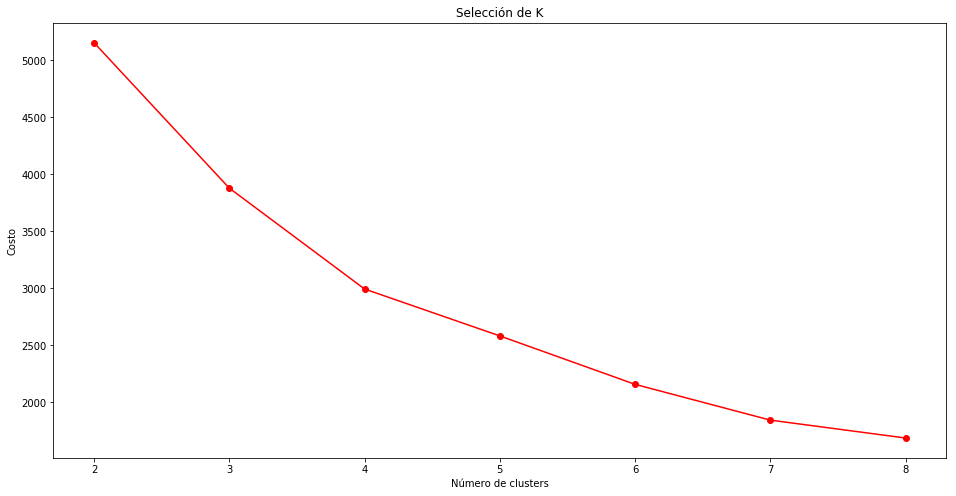

In [11]:
maxK = 8
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bienestar)
    costos.append(-kmeans.score(df_bienestar))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K')

De la gráfica anterior podemos ver que hay un punto de inflexión importante: 4 clusters. Ahora visualizaremos este agrupamiento.

In [12]:
col = ['DarkBlue', 'Red', 'Green', 'DarkGray', 'Yellow', 'Purple', 'Black', 'Pink']

<IPython.core.display.Javascript object>


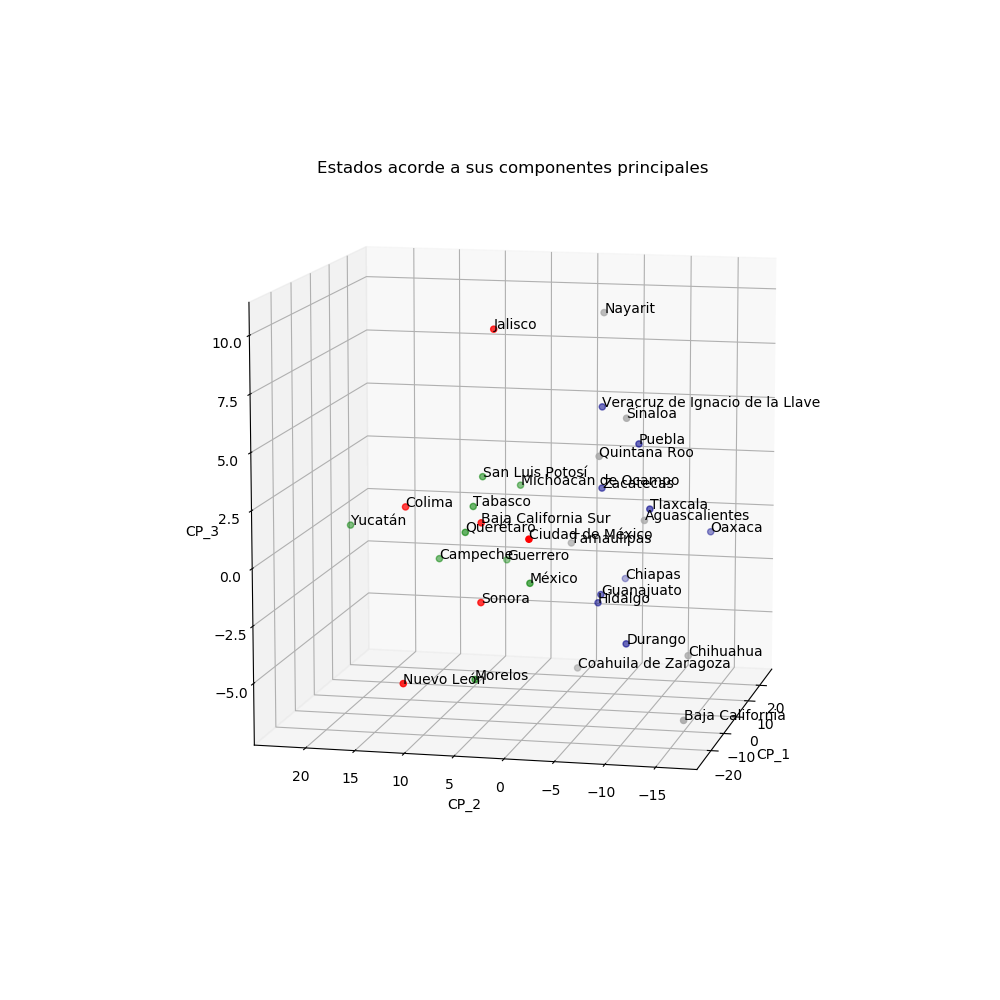

In [16]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(df_bienestar)
bienestar_pca_df['grupos'] = pd.Series(clusters.labels_, 
                                       index = bienestar_pca_df.index)

colores = [col[g] for g in bienestar_pca_df.grupos]

tresd_ax = plt.figure(figsize = (10,10)).gca(projection = '3d')
tresd_ax.scatter(bienestar_pca_df['CP_1'],
                bienestar_pca_df['CP_2'],
                bienestar_pca_df['CP_3'],
                c = colores)

tresd_ax.set_xlabel('CP_1')
tresd_ax.set_ylabel('CP_2')
tresd_ax.set_zlabel('CP_3')
tresd_ax.set_title('Estados acorde a sus componentes principales y a los clusters formados')

for i, estado in enumerate(bienestar_pca_df.index):
    tresd_ax.text(bienestar_pca_df.iloc[i].CP_1,
                  bienestar_pca_df.iloc[i].CP_2,
                  bienestar_pca_df.iloc[i].CP_3,
                  estado)

## Análisis de los prototipos

Después de ver como se agrupan los 32 estados del país, es hora de ver como se comportan los prototipos encontrados por las k-medias.

In [17]:
df_prototipos = pd.DataFrame(kmeans.cluster_centers_)
df_prototipos.index = ['P'+str(i + 1) for i in range(K)]
df_prototipos.columns = df_bienestar.columns
df_prototipos.index.names = ['Protopipo']
df_prototipos.columns.names = ['Indicadores']

df_prototipos

Indicadores,Hogares con acceso a banda ancha,Participación cívica y política,Participación electoral,Niveles de educación,Deserción escolar,Años promedio de escolaridad,Satisfacción con la vida,Satisfacción con tiempo para ocio
Protopipo,,,,,,,,
P1,22.504444,6.888889,43.133333,33.388889,13.788889,8.366667,7.855556,7.622222
P2,47.410000,6.116667,53.433333,47.400000,11.650000,9.966667,8.083333,7.850000
P3,28.985556,8.277778,57.900000,38.433333,13.911111,8.866667,7.877778,7.677778
P4,40.593750,6.737500,38.875000,43.150000,12.500000,9.525000,8.050000,7.887500
